# Banking Customer Churn Prediction - Philip Kim

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
# dont show warnings in chunks

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in the data

df = pd.read_csv("Churn_Modelling.csv")

In [4]:
# renaming columns for readability

df = df.rename(columns = {'NumOfProducts':'num_products', 'HasCrCard':'has_credit_card', 'IsActiveMember':'active',
                         'EstimatedSalary':'salary','Exited':'exited', 'CreditScore':'credit_score'})

# EDA

Exits make up 20.37% of all observations


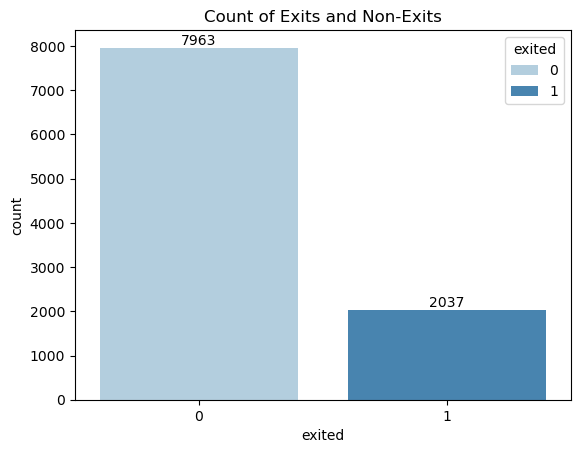

In [5]:
countplot = sns.countplot(x = 'exited', data = df, hue = "exited", palette = "Blues")
plt.title('Count of Exits and Non-Exits')

for i in countplot.containers: 
    countplot.bar_label(i,)
    
num_exit = df.loc[df['exited'] == 1].count()['exited']
num_rows = df.shape[0]

print(f"Exits make up {round((num_exit/num_rows)*100,2)}% of all observations")

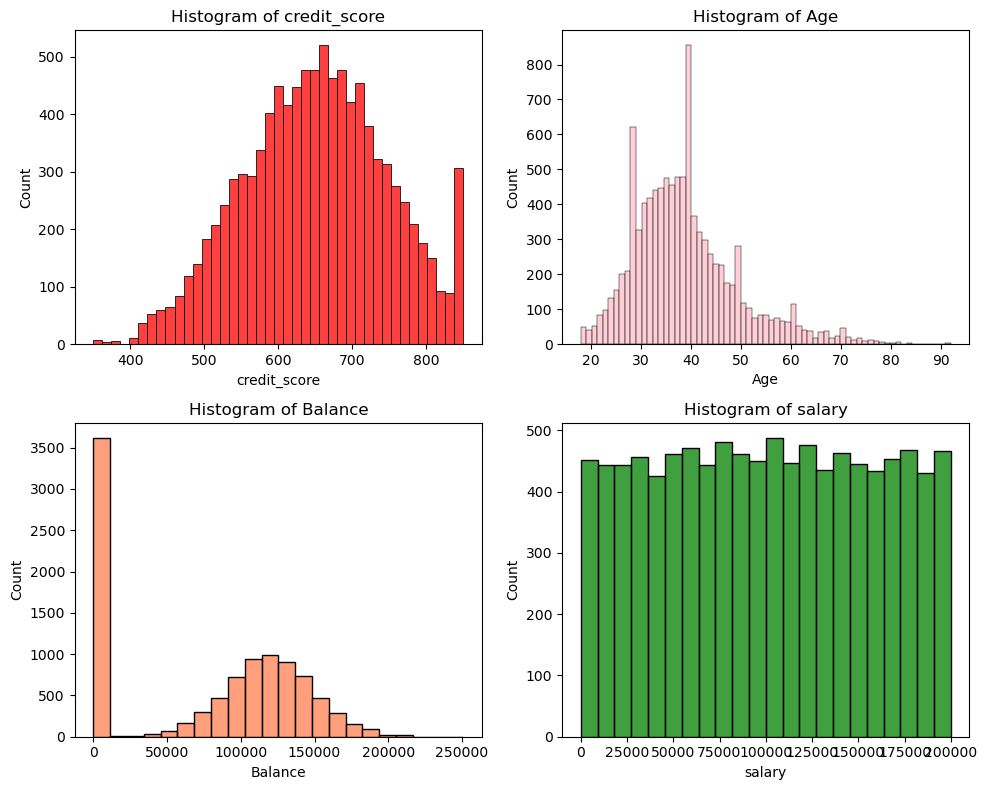

In [6]:
numeric_columns = df[['credit_score', 'Age', 'Balance', 'salary']]
colors = ['blue', 'red', 'coral', 'green', 'purple', 'pink']

fig, axes = plt.subplots(2, 2, squeeze=False, figsize=(10, 8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and plot on corresponding subplot
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axes[i], color = random.choice(colors))
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [7]:
numeric_df = df.select_dtypes(include = ['number'])
numeric_df.drop(["RowNumber", 'CustomerId'], inplace = True, axis = 1)
numeric_df.corr()

,credit_score,Age,Tenure,Balance,num_products,has_credit_card,active,salary,exited
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_products,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


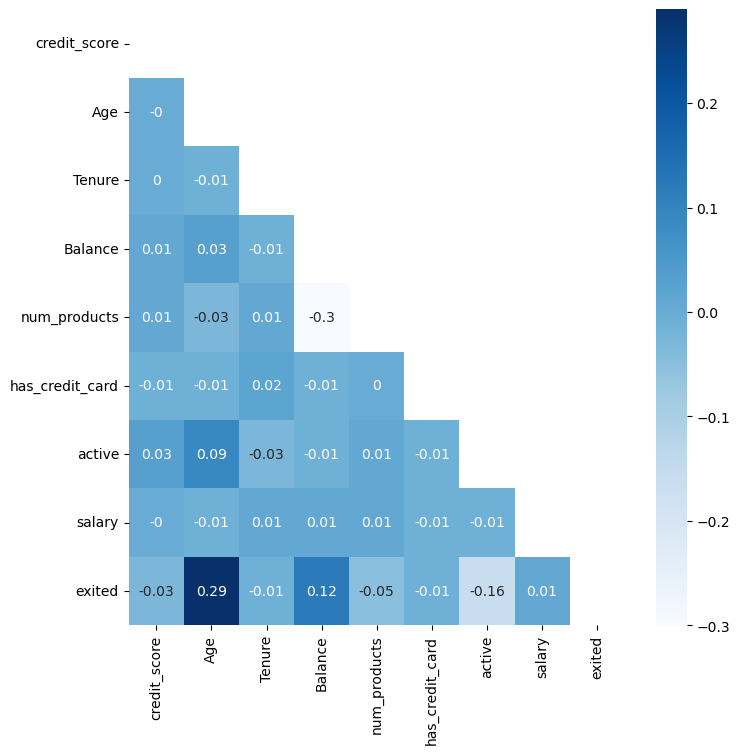

In [8]:
plt.figure(figsize=(8,8))

mask = np.triu(np.ones_like(numeric_df.corr()))

corr = sns.heatmap(round(numeric_df.corr(),2), annot=True, mask = mask, cmap = 'Blues')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [9]:
# Calculating Proportion of Exits by Country

num_obs_by_geo = df.groupby(df['Geography']).count()['exited']
num_exits_by_geo = df.groupby(df['Geography']).sum()['exited']
prop_exits_by_geo = (num_exits_by_geo / num_obs_by_geo)*100

print(f"{round(prop_exits_by_geo[0],2)}% of France users exited")
print(f"{round(prop_exits_by_geo[1],2)}% of Germany users exited")
print(f"{round(prop_exits_by_geo[2],2)}% of Spain users exited")

16.15% of France users exited
32.44% of Germany users exited
16.67% of Spain users exited


In [10]:
# Calculating Proportion of Exits by Gender

num_obs_by_gender = df.groupby(df['Gender']).count()['exited']
num_exits_by_gender = df.groupby(df['Gender']).sum()['exited']
prop_exits_by_gender = (num_exits_by_gender / num_obs_by_gender)*100

print(f"{round(prop_exits_by_gender[0],2)}% of Female users exited")
print(f"{round(prop_exits_by_gender[1],2)}% of Male users exited")

25.07% of Female users exited
16.46% of Male users exited


In [11]:
df.describe()

,RowNumber,CustomerId,credit_score,Age,Tenure,Balance,num_products,has_credit_card,active,salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# converting factor variables into factors for the next part of the EDA
factor_vars = df[['exited', 'has_credit_card', 'active']]

for factor in factor_vars:
    df[factor] = df[factor].astype('category')

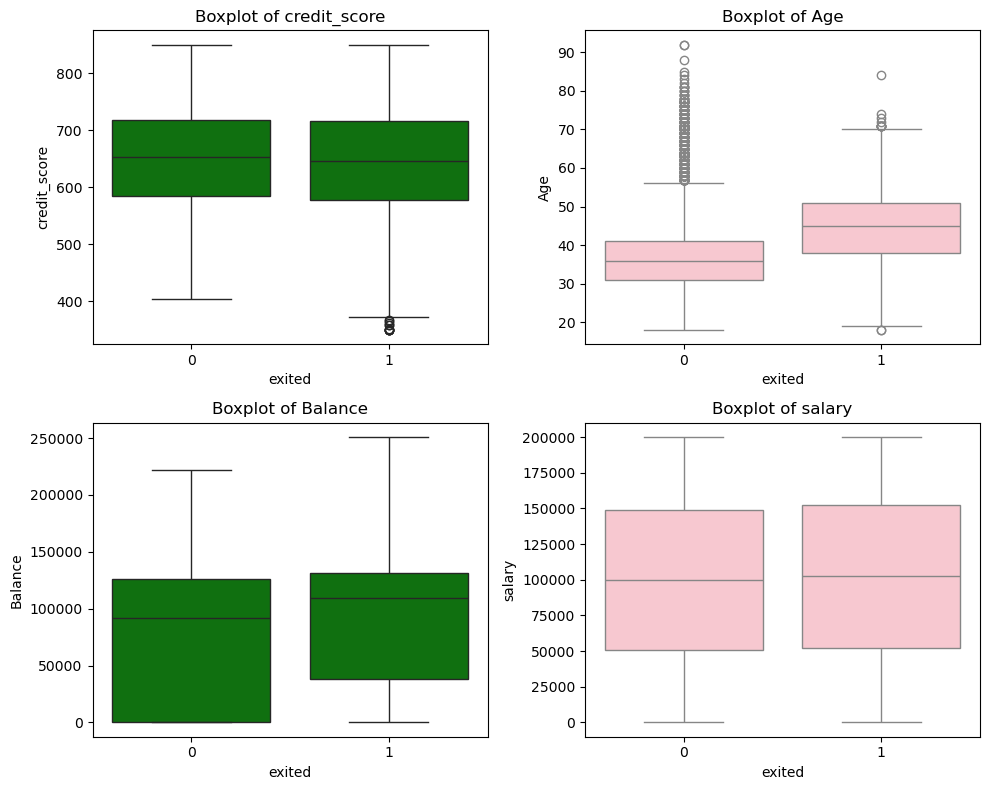

In [13]:
numeric_columns = df[['credit_score', 'Age', 'Balance', 'salary']]
colors = ['blue', 'red', 'coral', 'green', 'purple', 'pink']

fig, axes = plt.subplots(2, 2, squeeze=False, figsize=(10, 8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and plot on corresponding subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='exited', y = column, ax=axes[i], color = random.choice(colors))
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

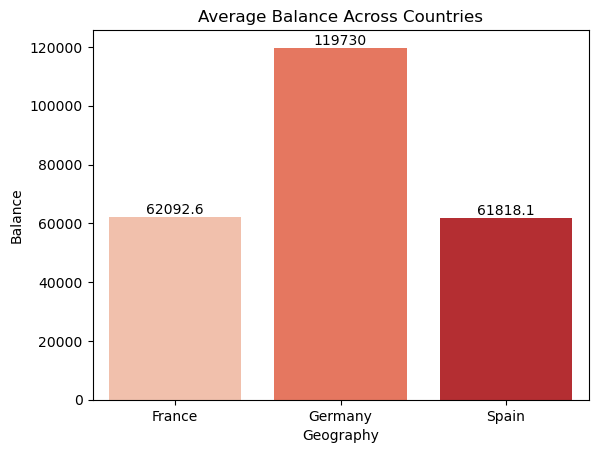

In [14]:
geo_df = df[['Geography', 'salary', 'credit_score', 'Age', 'Balance']]
balance_means = geo_df.groupby(geo_df['Geography']).mean()["Balance"]

geo_bar = sns.barplot(data = balance_means.to_frame(), x = 'Geography', y = 'Balance', hue = "Geography", palette = 'Reds')
plt.title('Average Balance Across Countries')

for i in geo_bar.containers:
    geo_bar.bar_label(i,)

# Modeling

In [15]:
df.head(5)

,RowNumber,CustomerId,Surname,credit_score,Geography,Gender,Age,Tenure,Balance,num_products,has_credit_card,active,salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# creating dummy variables

dummy_variables = pd.get_dummies(df[['Geography', 'Gender', 'has_credit_card', 'active']])
df_with_dummies = pd.concat([df, dummy_variables], axis=1)


df_with_dummies.drop(['Geography', 'Gender', 'has_credit_card', 'active'], inplace = True, axis = 1)

df_with_dummies

,RowNumber,CustomerId,Surname,credit_score,Age,Tenure,Balance,num_products,salary,exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,has_credit_card_0,has_credit_card_1,active_0,active_1
0,1,15634602,Hargrave,619,42,2,0.00,1,101348.88,1,True,False,False,True,False,False,True,False,True
1,2,15647311,Hill,608,41,1,83807.86,1,112542.58,0,False,False,True,True,False,True,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,113931.57,1,True,False,False,True,False,False,True,True,False
3,4,15701354,Boni,699,39,1,0.00,2,93826.63,0,True,False,False,True,False,True,False,True,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,79084.10,0,False,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,96270.64,0,True,False,False,False,True,False,True,True,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,101699.77,0,True,False,False,False,True,False,True,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,42085.58,1,True,False,False,True,False,True,False,False,True
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,92888.52,1,False,True,False,False,True,False,True,True,False


In [17]:
# creating the training and testing dataframes

predictors = df_with_dummies.drop(['RowNumber', 'CustomerId', 'Surname', 'exited'], axis = 1)
target = df_with_dummies['exited']


x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression()

# train the model on the training data
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy: .5f}")

Accuracy:  0.80050


In [44]:
# function to create the accuracy heatmap

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def acc_heatmap(palette, test_y, predictions):
    cm = confusion_matrix(test_y, predictions)
    sns.heatmap(cm, cmap=palette, annot=True, fmt = 'g',
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=["True Non-Exit","True Exit"], 
            yticklabels = ["Predicted Non Exit","Predicted Exit"])
    plt.title("Actual vs Predicted Heat Map")
    plt.show()

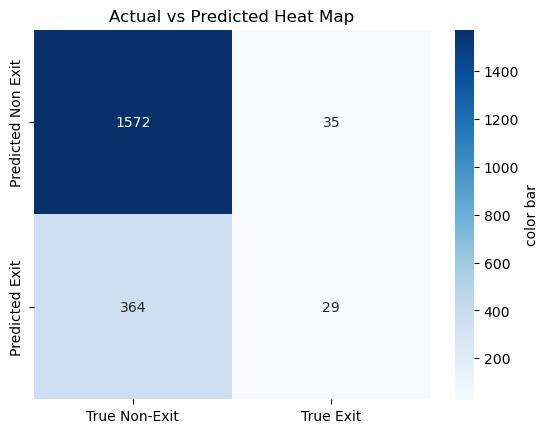

In [45]:
acc_heatmap(palette = "Blues", test_y = y_test, predictions = y_pred)

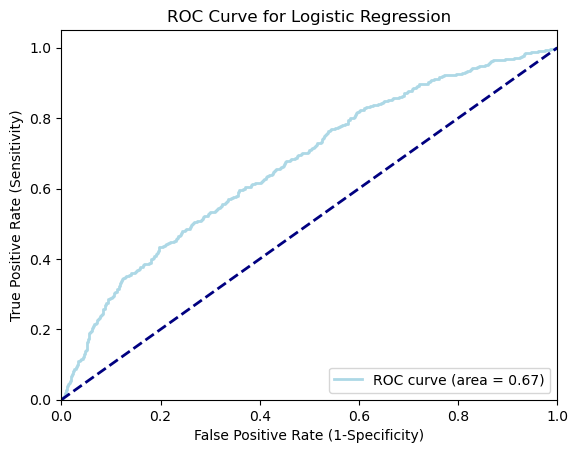

In [47]:
# ROC Curve for Logistic Regression

lr_prob = lr.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Define a range of neighbors to try
neighbors_range = range(1, 10)

# List to store mean cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation for each value of n_neighbors
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# Find the optimal number of neighbors
optimal_n = neighbors_range[np.argmax(cv_scores)]
print("Optimal number of neighbors:", optimal_n)

# run the final knn model with the optimal number of neighbors
knn = KNeighborsClassifier(optimal_n)
final_knn = knn.fit(x_train, y_train)

Optimal number of neighbors: 8


In [23]:
knn_pred = final_knn.predict(x_test)

# knn accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {knn_accuracy: .5f}")

Accuracy:  0.79600


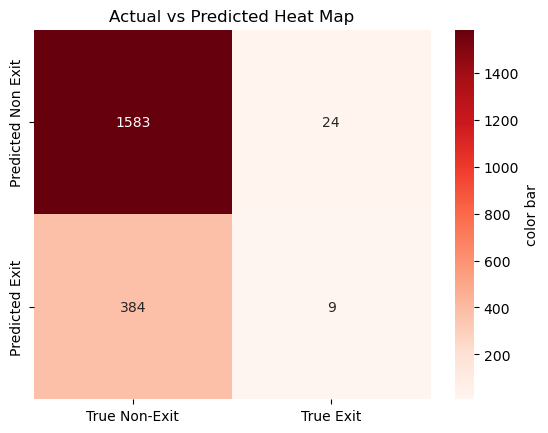

In [24]:
# accuracy heatmap for knn
acc_heatmap(palette = "Reds", test_y = y_test, predictions = knn_pred)

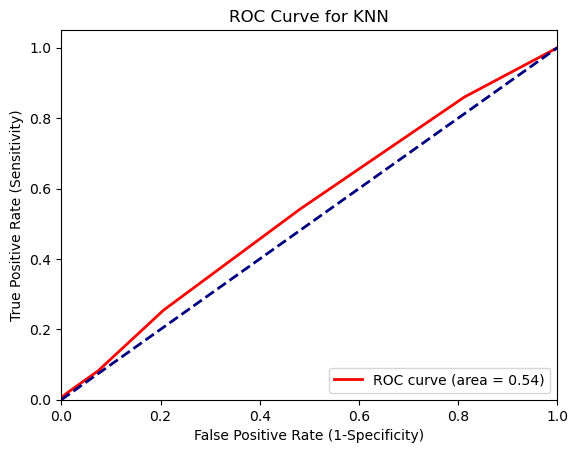

In [37]:
# ROC Curve for KNN

knn_prob = final_knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

## Random Forest


In [25]:
from sklearn.ensemble import RandomForestClassifier

# cross validation for random forests, finding the optimal mtry
mtry_range = range(1,10)
rf_cv_scores = []

for i in mtry_range:
    rf = RandomForestClassifier(n_estimators = 100, max_features = i)
    scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
    rf_cv_scores.append(scores.mean())

# print the optimal mtry
optimal_mtry = mtry_range[np.argmax(rf_cv_scores)]
print("Optimal mtry:", optimal_mtry)

Optimal mtry: 6


In [26]:
# using the optimal mtry, run the final random forest model
rf = RandomForestClassifier(n_estimators = 100, max_features = optimal_mtry)
rf_fit = rf.fit(x_train, y_train)
rf_pred = rf_fit.predict(x_test)

# rf accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy: .2f}")

Accuracy:  0.86


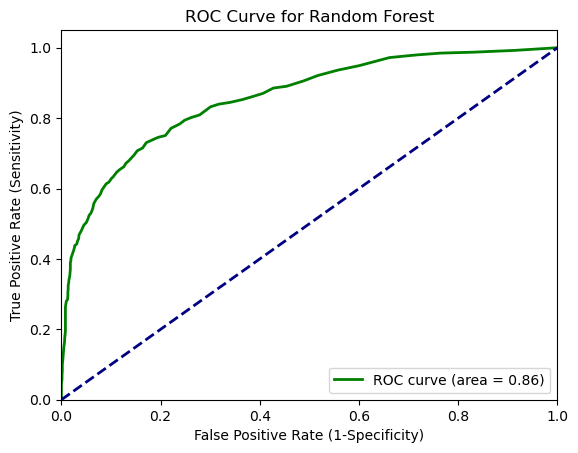

In [48]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score

# ROC Curve

rf_prob = rf_fit.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

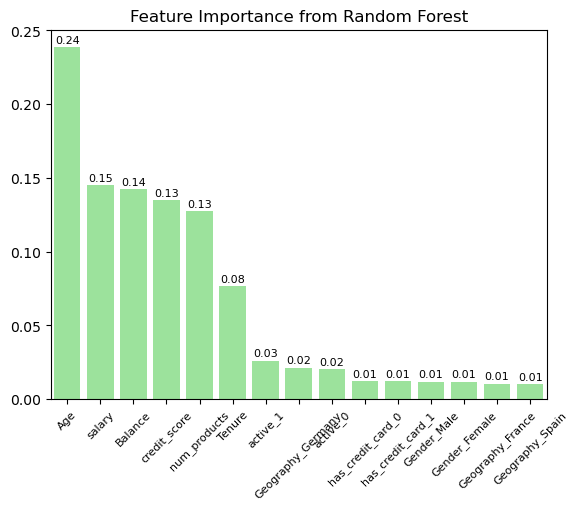

In [49]:
# Feature importance

feature_scores = pd.Series(rf_fit.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_imp_plot = sns.barplot(feature_scores, color = "lightgreen")
plt.title("Feature Importance from Random Forest")
plt.gca().tick_params(axis='x', labelsize=8, rotation = 45)

for bar in feature_imp_plot.containers[0]:
    height = bar.get_height()
    feature_imp_plot.annotate(f'{height:.2f}', 
                              xy=(bar.get_x() + bar.get_width() / 2, height),
                              xytext=(0, 3),  
                              textcoords="offset points",
                              ha='center', 
                              fontsize=8)  # Adjust the font size here



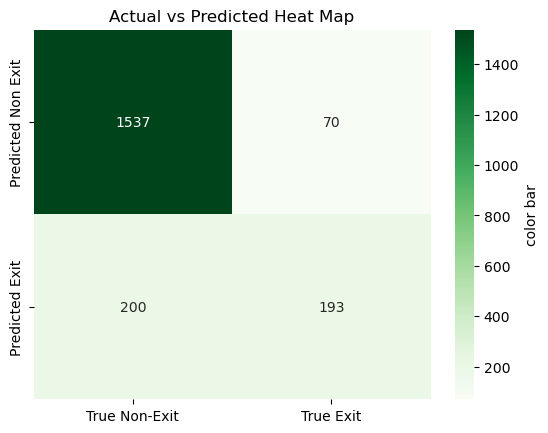

In [28]:
# Random Forest accuracy heatmap

acc_heatmap(palette = 'Greens', test_y = y_test, predictions = rf_pred)

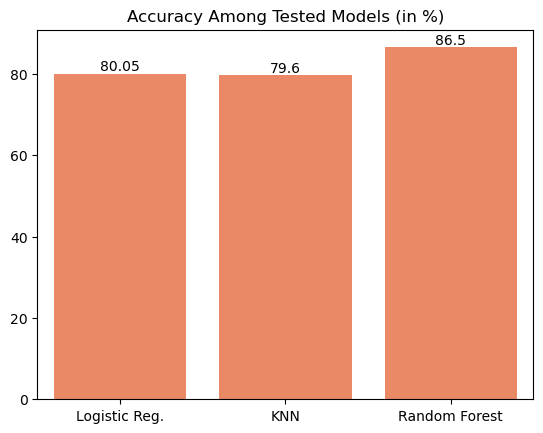

In [29]:
# All Models Accuracy Barplot

accuracies = [lr_accuracy * 100, knn_accuracy * 100, rf_accuracy * 100]
acc_plot = sns.barplot(accuracies, color = 'coral')
plt.title("Accuracy Among Tested Models (in %)")
new_labels = ['Logistic Reg.', 'KNN', 'Random Forest']
plt.gca().set_xticklabels(new_labels)
for i in acc_plot.containers:
    acc_plot.bar_label(i,)


# Conclusions

From the 3 methods (logistic regression, KNN, random forest), random forest resulted in the highest accuracy (86.50%). K-Nearest Neighbors resulted in the lowest accuracy (79.60%), while logistic regression resulted in an 80.05% accuracy. The ROC curves also support the idea that random forests are the optimal model, as curve hugs the top left corner of the graph, while the ROC curves for LR and KNN are much closer to the straight line. Therefore, we also see that the AUC for random forest is the highest (0.86), while LR (0.67) and KNN (0.54) have smaller areas. Random forest reveals that the most important factors in determining customer churn is the age of the customer, followed by salary, balance, credit score, and number of products all clustered together at similar levels of importance. 